# "Hyperparameter Tuning in Python"
> "Building powerful machine learning models depends heavily on the set of hyperparameters used. But with increasingly complex models with lots of options, how do you efficiently find the best settings for your particular problem? In this course you will get practical experience in using some common methodologies for automated hyperparameter tuning in Python using Scikit Learn. These include Grid Search, Random Search & advanced optimization methodologies including Bayesian & Genetic algorithms . You will use a dataset predicting credit card defaults as you build skills to dramatically increase the efficiency and effectiveness of your machine learning model building."
- toc: true
- branch: master
- badges: true
- comments: true
- author: Islam Mansour
- categories: [Python, DataCamp, Machine Learning Scientist with Python]
- hide: false

# Hyperparameter Tuning in Python

---



**Course Description**

Building powerful machine learning models depends heavily on the set of hyperparameters used. But with increasingly complex models with lots of options, how do you efficiently find the best settings for your particular problem? In this course you will get practical experience in using some common methodologies for automated hyperparameter tuning in Python using Scikit Learn. These include Grid Search, Random Search & advanced optimization methodologies including Bayesian & Genetic algorithms . You will use a dataset predicting credit card defaults as you build skills to dramatically increase the efficiency and effectiveness of your machine learning model building.


# 1. Hyperparameters and Parameters
In this introductory chapter you will learn the difference between hyperparameters and parameters. You will practice extracting and analyzing parameters, setting hyperparameter values for several popular machine learning algorithms. Along the way you will learn some best practice tips & tricks for choosing which hyperparameters to tune and what values to set & build learning curves to analyze your hyperparameter choices.

[link text](https://projector-video-pdf-converter.datacamp.com/15167/chapter1.pdf#pdfjs.action=download)

## 1.1 Introduction & 'Parameters'


## 1.2 Parameters in Logistic Regression
Now that you have had a chance to explore what a parameter is, let us apply this knowledge. It is important to be able to review any new algorithm and identify which elements are parameters and hyperparameters.

Which of the following is a parameter for the Scikit Learn logistic regression model? Here we mean _conceptually_ based on the theory introduced in this course. **NOT** what the Scikit Learn documentation calls a parameter or attribute.

##### Answer the question

**50XP**

#### Possible Answers

- `n_jobs`

- **`coef_`**

- `class_weight`

- `LogisticRegression()`

Yes! `coef_` contains the important information about coefficients on our variables in the model. We do not set this, it is learned by the algorithm through the modeling process.

## 1.3 Extracting a Logistic Regression parameter
You are now going to practice extracting an important parameter of the logistic regression model. The logistic regression has a few other parameters you will not explore here but you can review them in the [scikit-learn.org](https://scikit-learn.org/) documentation for the `LogisticRegression()` module under 'Attributes'.

This parameter is important for understanding the direction and magnitude of the effect the variables have on the target.

In this exercise we will extract the coefficient parameter (found in the `coef_` attribute), zip it up with the original column names, and see which variables had the largest positive effect on the target variable.

You will have available:

- A logistic regression model object named `log_reg_clf`
- The `X_train` DataFrame

`sklearn` and `pandas` have been imported for you.

##### Instructions

**100 XP**

- Create a list of the original column names used in the training DataFrame.
- Extract the coefficients of the logistic regression estimator.
- Create a DataFrame of coefficients and variable names & view it.
- Print out the top 3 'positive' variables based on the coefficient size.

In [ ]:
# Create a list of original variable names from the training DataFrame
original_variables = list(X_train.columns)

# Extract the coefficients of the logistic regression estimator
model_coefficients = log_reg_clf.coef_[0]

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({"Variable" : original_variables, "Coefficient": model_coefficients})
print(coefficient_df)

# Print out the top 3 positive variables
top_three_df = coefficient_df.sort_values(by='Coefficient', axis=0, ascending=False)[0:3]
print(top_three_df)

Nice! You have succesfully extracted and reviewed a very important parameter for the Logistic Regression Model. The coefficients of the model allow you to see which variables are having a larger or smaller impact on the outcome. Additionally the sign lets you know if it is a positive or negative relationship.

## 1.4 Extracting a Random Forest parameter
You will now translate the work previously undertaken on the logistic regression model to a random forest model. A parameter of this model is, for a given tree, how it decided to split at each level.

This analysis is not as useful as the coefficients of logistic regression as you will be unlikely to ever explore every split and every tree in a random forest model. However, it is a very useful exercise to peak under the hood at what the model is doing.

In this exercise we will extract a single tree from our random forest model, visualize it and programmatically extract one of the splits.

You have available:

- A random forest model object, `rf_clf`
- An image of the top of the chosen decision tree, `tree_viz_image`
- The `X_train` DataFrame & the `original_variables` list

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Extract the 7th tree (6th index) from the random forest model.
- Visualize this tree (`tree_viz_image`) to see the split decisions.
- Extract the feature & level of the top split.
- Print out the feature and level together.

In [ ]:
# Extract the 7th (index 6) tree from the random forest
chosen_tree = rf_clf.estimators_[6]

# Visualize the graph using the provided image
imgplot = plt.imshow(tree_viz_image)
plt.show()

# Extract the parameters and level of the top (index 0) node
split_column = chosen_tree.tree_.feature[0]
split_column_name = X_train.columns[split_column]
split_value = chosen_tree.tree_.threshold[0]

# Print out the feature and level
print("This node split on feature {}, at a value of {}".format(split_column_name, split_value))

Excellent! You visualized and extracted some of the parameters of a random forest model.



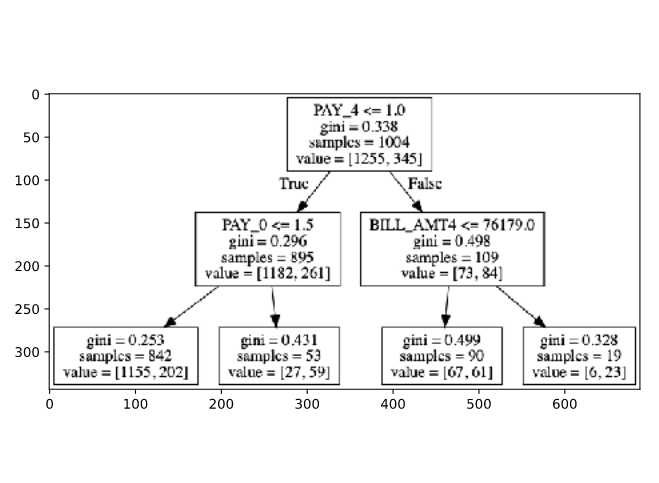

## 1.5 Introducing Hyperparameters


## 1.6 Hyperparameters in Random Forests
As you saw, there are many different hyperparameters available in a Random Forest model using Scikit Learn. Here you can remind yourself how to differentiate between a hyperparameter and a parameter, and easily check whether something is a hyperparameter.

You can create a random forest estimator yourself from the imported Scikit Learn package. Then print this estimator out to see the hyperparameters and their values.

Which of the following is a hyperparameter for the Scikit Learn random forest model?

##### Instructions

**50 XP**

##### Possible Answers

- `oob_score`
    
- `classes_`
    
- `trees`
    
- `random_level`

That's correct! `oob_score` set to `True` or `False` decides whether to use out-of-bag samples to estimate the generalization accuracy.

## 1.7 Exploring Random Forest Hyperparameters
Understanding what hyperparameters are available and the impact of different hyperparameters is a core skill for any data scientist. As models become more complex, there are many different settings you can set, but only some will have a large impact on your model.

You will now assess an existing random forest model (it has some bad choices for hyperparameters!) and then make better choices for a new random forest model and assess its performance.

You will have available:

- `X_train`, `X_test`, `y_train`, `y_test` DataFrames
- An existing pre-trained random forest estimator, `rf_clf_old`
- The predictions of the existing random forest estimator on the test set, `rf_old_predictions`

##### Instructions 1/3

**35 XP**

- Print out the hyperparameters of the existing random forest classifier by printing the estimator and then create a confusion matrix and accuracy score from it. The test set `y_test` and the old predictions `rf_old_predictions` will be quite useful!

In [ ]:
# Print out the old estimator, notice which hyperparameter is badly set
print(rf_clf_old)

# Get confusion matrix & accuracy for the old rf_model
print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
  	confusion_matrix(y_test, rf_old_predictions),
  	accuracy_score(y_test, rf_old_predictions))) 


##### Instructions 2/3

**35 XP**

- Create a new random forest classifier with a better `n_estimators` (try 500) then fit this to the data and obtain predictions.

In [ ]:
# Print out the old estimator, notice which hyperparameter is badly set
print(rf_clf_old)

# Get confusion matrix & accuracy for the old rf_model
print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
  confusion_matrix(y_test, rf_old_predictions),
  accuracy_score(y_test, rf_old_predictions))) 

# Create a new random forest classifier with better hyperparamaters
rf_clf_new = RandomForestClassifier(n_estimators=500)

# Fit this to the data and obtain predictions
rf_new_predictions = rf_clf_new.fit(X_train, y_train).predict(X_test)

##### Instructions 3/3

**30 XP**

- Assess the performance of the new random forest classifier. Create the confusion matrix and accuracy score and print them out. How does this compare to the first model you were given?

In [ ]:
# Print out the old estimator, notice which hyperparameter is badly set
print(rf_clf_old)

# Get confusion matrix & accuracy for the old rf_model
print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
  confusion_matrix(y_test, rf_old_predictions),
  accuracy_score(y_test, rf_old_predictions))) 

# Create a new random forest classifier with better hyperparamaters
rf_clf_new = RandomForestClassifier(n_estimators=500)

# Fit this to the data and obtain predictions
rf_new_predictions = rf_clf_new.fit(X_train, y_train).predict(X_test)

# Assess the new model (using new predictions!)
print("Confusion Matrix: \n\n", confusion_matrix(y_test, rf_new_predictions))
print("Accuracy Score: \n\n", accuracy_score(y_test, rf_new_predictions))

Nice! We got a nice 5% accuracy boost just from changing the `n_estimators`. You have had your first taste of hyperparameter tuning for a random forest model.

## 1.8 Hyperparameters of KNN
To apply the concepts learned in the prior exercise, it is good practice to try out learnings on a new algorithm. The k-nearest-neighbors algorithm is not as popular as it used to be but can still be an excellent choice for data that has groups of data that behave similarly. Could this be the case for our credit card users?

In this case you will try out several different values for one of the core hyperparameters for the knn algorithm and compare performance.

You will have available:

- `X_train`, `X_test`, `y_train`, `y_test` DataFrames

##### Instructions

**100 XP**

- Build a knn estimator for the following values of `n_neighbors` \[5,10,20\].
- Fit each to the training data and produce predictions.
- Get an accuracy score for each model and print them out.

In [ ]:
# Build a knn estimator for each value of n_neighbours
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_20 = KNeighborsClassifier(n_neighbors=20)

# Fit each to the training data & produce predictions
knn_5_predictions = knn_5.fit(X_train, y_train).predict(X_test)
knn_10_predictions = knn_10.fit(X_train, y_train).predict(X_test)
knn_20_predictions = knn_20.fit(X_train, y_train).predict(X_test)

# Get an accuracy score for each of the models
knn_5_accuracy = accuracy_score(y_test, knn_5_predictions)
knn_10_accuracy = accuracy_score(y_test, knn_10_predictions)
knn_20_accuracy = accuracy_score(y_test, knn_20_predictions)
print("The accuracy of 5, 10, 20 neighbours was {}, {}, {}".format(knn_5_accuracy, knn_10_accuracy, knn_20_accuracy))

Phew! You succesfully tested 3 different options for 1 hyperparameter, but it was pretty exhausting. Next, we will try to find a way to make this easier.

## 1.9 Setting & Analyzing Hyperparameter Values


## 1.10 Automating Hyperparameter Choice
Finding the best hyperparameter of interest without writing hundreds of lines of code for hundreds of models is an important efficiency gain that will greatly assist your future machine learning model building.

An important hyperparameter for the GBM algorithm is the learning rate. But which learning rate is best for this problem? By writing a loop to search through a number of possibilities, collating these and viewing them you can find the best one.

Possible learning rates to try include 0.001, 0.01, 0.05, 0.1, 0.2 and 0.5

You will have available `X_train`, `X_test`, `y_train` & `y_test` datasets, and `GradientBoostingClassifier` has been imported for you.

##### Instructions

**100 XP**

- Create a `learning_rates` list for the learning rates, and a `results_list` to hold the accuracy score of your predictions.
- Write a loop to create a GBM model for each learning rate mentioned and create predictions for each model.
- Save the learning rate and accuracy score to a `results_list`.
- Turn the results list into a DataFrame and print it out.

In [ ]:
# Set the learning rates & results storage
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
results_list = []

# Create the for loop to evaluate model predictions for each learning rate
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(learning_rate=learning_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    # Save the learning rate and accuracy score
    results_list.append([learning_rate, accuracy_score(y_test, predictions)])

# Gather everything into a DataFrame
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])
print(results_df)

Nice! You efficiently tested a few different values for a single hyperparameter and can easily see which learning rate value was the best. Here, it seems that a learning rate of 0.05 yields the best accuracy.

## 1.11 Building Learning Curves

If we want to test many different values for a single hyperparameter it can be difficult to easily view that in the form of a DataFrame. Previously you learned about a nice trick to analyze this. A graph called a 'learning curve' can nicely demonstrate the effect of increasing or decreasing a particular hyperparameter on the final result.

Instead of testing only a few values for the learning rate, you will test many to easily see the effect of this hyperparameter across a large range of values. A useful function from NumPy is `np.linspace(start, end, num)` which allows you to create a number of values (`num`) evenly spread within an interval (`start`, `end`) that you specify.

You will have available `X_train`, `X_test`, `y_train` & `y_test` datasets.

##### Instructions

**100 XP**

- Create a list of 30 learning rates evenly spread between 0.01 and 2.
- Create a similar loop to last exercise but just save out accuracy scores to a list.
- Plot the learning rates against the accuracy score.

In [ ]:
# Set the learning rates & accuracies list
learn_rates = np.linspace(0.01, 2, num=30)
accuracies = []

# Create the for loop
for learn_rate in learn_rates:
  	# Create the model, predictions & save the accuracies as before
    model = GradientBoostingClassifier(learning_rate=learn_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Plot results    
plt.plot(learn_rates, accuracies);
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates')
plt.show()

Excellent work! You can see that for low values, you get a pretty good accuracy. However once the learning rate pushes much above 1.5, the accuracy starts to drop. You have learned and practiced a useful skill for visualizing large amounts of results for a single hyperparameter.

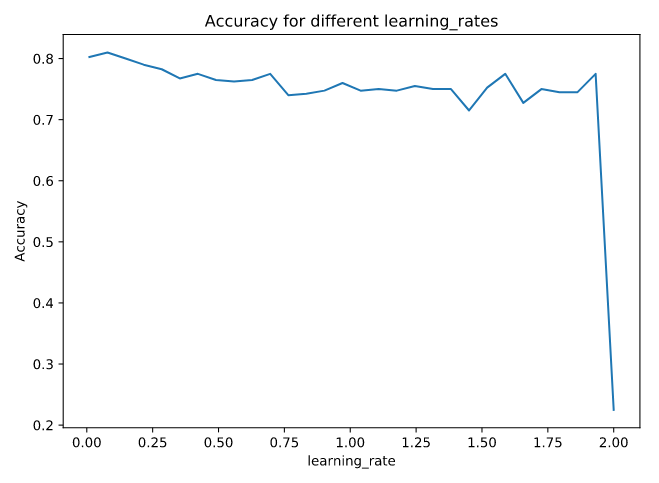

# 2. Grid search
This chapter introduces you to a popular automated hyperparameter tuning methodology called Grid Search. You will learn what it is, how it works and practice undertaking a Grid Search using Scikit Learn. You will then learn how to analyze the output of a Grid Search & gain practical experience doing this.

## 2.1 Introducing Grid Search


## 2.2 Build Grid Search functions
In data science it is a great idea to try building algorithms, models and processes 'from scratch' so you can really understand what is happening at a deeper level. Of course there are great packages and libraries for this work (and we will get to that very soon!) but building from scratch will give you a great edge in your data science work.

In this exercise, you will create a function to take in 2 hyperparameters, build models and return results. You will use this function in a future exercise.

You will have available the `X_train`, `X_test`, `y_train` and `y_test` datasets available.

##### Instructions

**100 XP**

- Build a function that takes two parameters called `learning_rate` and `max_depth` for the learning rate and maximum depth.
- Add capability in the function to build a GBM model and fit it to the data with the input hyperparameters.
- Have the function return the results of that model and the chosen hyperparameters (`learning_rate` and `max_depth`).

In [ ]:
# Create the function
def gbm_grid_search(learning_rate, max_depth):

	# Create the model
    model = GradientBoostingClassifier(learning_rate=learning_rate, max_depth=max_depth)
    
    # Use the model to make predictions
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    # Return the hyperparameters and score
    return([learning_rate, max_depth, accuracy_score(y_test, predictions)])

Nice! You now have a function you can call to test different combinations of two hyperparameters for the GBM algorithm. In the next exercise we will use it to test some values and analyze the results.

## 2.3 Iteratively tune multiple hyperparameters
In this exercise, you will build on the function you previously created to take in 2 hyperparameters, build a model and return the results. You will now use that to loop through some values and then extend this function and loop with another hyperparameter.

The function `gbm_grid_search(learn_rate, max_depth)` is available in this exercise.

If you need to remind yourself of the function you can run the function `print_func()` that has been created for you

##### Instructions 1/3

**35 XP**

- Write a for-loop to test the values (0.01, 0.1, 0.5) for the `learning_rate` and (2, 4, 6) for the `max_depth` using the function you created `gbm_grid_search` and print the results.

In [ ]:
# Create the relevant lists
results_list = []
learn_rate_list = [0.01, 0.1, 0.5]
max_depth_list = [2, 4, 6]

# Create the for loop
for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
        results_list.append(gbm_grid_search(learn_rate,max_depth))

# Print the results
print(results_list)   

##### Instructions 2/3

**35 XP**


- Extend the `gbm_grid_search` function to include the hyperparameter `subsample`. Name this new function `gbm_grid_search_extended`.

In [ ]:
results_list = []
learn_rate_list = [0.01, 0.1, 0.5]
max_depth_list = [2,4,6]

# Extend the function input
def gbm_grid_search_extended(learn_rate, max_depth, subsample):

	# Extend the model creation section
    model = GradientBoostingClassifier(learning_rate=learn_rate, max_depth=max_depth, subsample=subsample)
    
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    # Extend the return part
    return([learn_rate, max_depth, subsample, accuracy_score(y_test, predictions)])       

##### Instructions 3/3

**30 XP**

- Extend your loop to call `gbm_grid_search` (available in your console), then test the values \[0.4 , 0.6\] for the `subsample` hyperparameter and print the results. `max_depth_list` & `learn_rate_list` are available in your environment.

In [ ]:
results_list = []

# Create the new list to test
subsample_list = [0.4, 0.6]

for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
    
    	# Extend the for loop
        for subsample in subsample_list:
        	
            # Extend the results to include the new hyperparameter
            results_list.append(gbm_grid_search_extended(learn_rate, max_depth, subsample))
            
# Print results
print(results_list)            

Congratulations. You have effectively built your own grid search! You went from 2 to 3 hyperparameters and can see how you could extend that to even more values and hyperparameters. That was a lot of effort though. Be warned - we are now entering a world that can get very computationally expensive very fast!

## 2.4 How Many Models?
Adding more hyperparameters or values, you increase the amount of models created but the increases is not linear it is proportional to how many values and hyperparameters you already have.

How many models would be created when running a grid search over the following hyperparameters and values for a GBM algorithm?

- learning\_rate = \[0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2\]
- max\_depth = \[4,6,8,10,12,14,16,18, 20\]
- subsample = \[0.4, 0.6, 0.7, 0.8, 0.9\]
- max\_features = \['auto', 'sqrt', 'log2'\]

These lists are in your console so you can utilize properties of them to help you!

##### Instructions

**50 XP**

##### Possible Answers

- 26
    
- 9 of one model, 9 of another
    
- 1 large model
    
- **1215**

```python
In [2]:
len(learning_rate) * len(max_depth) * len(subsample) * len(max_features)
Out[2]:
1215
```

Excellent! For every value of one hyperparameter, we test EVERY value of EVERY other hyperparameter. So you correctly multiplied the number of values (the lengths of the lists).

## 2.5 Grid Search with Scikit Learn



## 2.6 GridSearchCV inputs

Let's test your knowledge of `GridSeachCV` inputs by answering the question below.

Three `GridSearchCV` objects are available in the console, named `model_1`, `model_2`, `model_3`. Note that there is no data available to fit these models. Instead, you must answer by looking at their construct.

Which of these `GridSearchCV` objects would not work when we try to fit it?

##### Instructions

**50 XP**

##### Possible Answers

- `model_1` would not work when we try to fit it.
    
- `model_2` would not work when we try to fit it.
    
- **`model_3` would not work when we try to fit it.**
    
- None - they will all work when we try to fit them.


Correct! By looking at the Scikit Learn documentation (or your excellent memory!) you know that `number_attempts` is not a valid hyperparameter. This `GridSearchCV` will not fit to our data.

```python
Model #1:
 GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = {'max_depth': [2, 4, 8, 15], 'max_features': ['auto', 'sqrt']},
    scoring='roc_auc',
    n_jobs=4,
    cv=5,
    refit=True, return_train_score=True) 


Model #2:
 GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = {'n_neighbors': [5, 10, 20], 'algorithm': ['ball_tree', 'brute']},
    scoring='accuracy',
    n_jobs=8,
    cv=10,
    refit=False) 


Model #3:
 GridSearchCV(
    estimator = GradientBoostingClassifier(),
    param_grid = {'number_attempts': [2, 4, 6], 'max_depth': [3, 6, 9, 12]},
    scoring='accuracy',
    n_jobs=2,
    cv=7,
    refit=True) 
```

## 2.7 GridSearchCV with Scikit Learn


The `GridSearchCV` module from Scikit Learn provides many useful features to assist with efficiently undertaking a grid search. You will now put your learning into practice by creating a `GridSearchCV` object with certain parameters.

The desired options are:

- A Random Forest Estimator, with the split criterion as 'entropy'
- 5-fold cross validation
- The hyperparameters `max_depth` (2, 4, 8, 15) and `max_features` ('auto' vs 'sqrt')
- Use `roc_auc` to score the models
- Use 4 cores for processing in parallel
- Ensure you refit the best model and return training scores

You will have available `X_train`, `X_test`, `y_train` & `y_test` datasets.

##### Instructions

**100 XP**

- Create a Random Forest estimator as specified in the context above.
- Create a parameter grid as specified in the context above.
- Create a `GridSearchCV` object as outlined in the context above, using the two elements created in the previous two instructions.

In [ ]:
# Create a Random Forest Classifier with specified criterion
rf_class = RandomForestClassifier(criterion='entropy')

# Create the parameter grid
param_grid = { 'max_depth':[2, 4, 8, 15],
    'max_features':['auto', 'sqrt']} 

# Create a GridSearchCV object
grid_rf_class = GridSearchCV(
    estimator=rf_class,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=4,
    cv=5,
    refit=True,
    return_train_score=True)
print(grid_rf_class)


Excellent work! You now understand all the inputs to a `GridSearchCV` object and can tune many different hyperparameters and many different values for each on a chosen algorithm!

## 2.8 Understanding a grid search output


## 2.9 Using the best outputs


Which of the following parameters must be set in order to be able to directly use the `best_estimator_` property for predictions?

##### Answer the question

**50XP**

#### Possible Answers

- `return_train_score = True`

- **`refit = True`**
    
- `refit = False`
    
- `verbose = 1`

Correct! When we set this to true, the creation of the grid search object automatically refits the best parameters on the whole training set and creates the `best_estimator_` property.

## 2.10 Exploring the grid search results
You will now explore the `cv_results_` property of the GridSearchCV object defined in the video. This is a dictionary that we can read into a pandas DataFrame and contains a lot of useful information about the grid search we just undertook.

A reminder of the different column types in this property:

- `time_` columns
- `param_` columns (one for each hyperparameter) and **the** singular `params` column (with all hyperparameter settings)
- a `train_score` column for each cv fold including the `mean_train_score` and `std_train_score` columns
- a `test_score` column for each cv fold including the `mean_test_score` and `std_test_score` columns
- a `rank_test_score` column with a number from 1 to n (number of iterations) ranking the rows based on their `mean_test_score`

##### Instructions

**100 XP**

- Read the `cv_results_` property of the `grid_rf_class` GridSearchCV object into a data frame & print the whole thing out to inspect.
- Extract & print the **singular** column containing a dictionary of all hyperparameters used in each iteration of the grid search.
- Extract & print the row that had the best mean test score by indexing using the `rank_test_score` column.

In [ ]:
# Read the cv_results property into a dataframe & print it out
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
print(cv_results_df)

# Extract and print the column with a dictionary of hyperparameters used
column = cv_results_df.loc[:, ["params"]]
print(column)

# Extract and print the row that had the best mean test score
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1]
print(best_row)

Great work! You have built invaluable skills in looking 'under the hood' at what your grid search is doing by extracting and analysing the `cv_results_` property.

## 2.11 Analyzing the best results

At the end of the day, we primarily care about the best performing 'square' in a grid search. Luckily Scikit Learn's `gridSearchCv` objects have a number of parameters that provide key information on just the best square (or row in `cv_results_`).

Three properties you will explore are:

- `best_score_` – The score (here ROC\_AUC) from the best-performing square.
- `best_index_` – The index of the row in `cv_results_` containing information on the best-performing square.
- `best_params_` – A dictionary of the parameters that gave the best score, for example `'max_depth': 10`

The grid search object `grid_rf_class` is available.

A dataframe (`cv_results_df`) has been created from the `cv_results_` for you on line 6. This will help you index into the results.

##### Instructions

**100 XP**

- Extract and print out the ROC\_AUC **score** from the **best** performing square in `grid_rf_class`.
- Create a variable from the best-performing row by **index**ing into `cv_results_df`.
- Create a variable, `best_n_estimators` by extracting the `n_estimators` parameter from the best-performing square in `grid_rf_class` and print it out.

In [ ]:
# Print out the ROC_AUC score from the best-performing square
best_score = grid_rf_class.best_score_
print(best_score)

# Create a variable from the row related to the best-performing square
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
best_row = cv_results_df.loc[[grid_rf_class.best_index_]]
print(best_row)

# Get the n_estimators parameter from the best-performing square and print
best_n_estimators = grid_rf_class.best_params_['n_estimators']
print(best_n_estimators)

Nice stuff! Being able to quickly find and prioritize the huge volume of information given back from machine learning modeling output is a great skill. Here you had great practice doing that with `cv_results_` by quickly isolating the key information on the best performing square. This will be very important when your grids grow from 12 squares to many more!

## 2.12 Using the best results

While it is interesting to analyze the results of our grid search, our final goal is practical in nature; we want to make predictions on our test set using our estimator object.

We can access this object through the `best_estimator_` property of our grid search object.

Let's take a look inside the `best_estimator_` property, make predictions, and generate evaluation scores. We will firstly use the default `predict` (giving class predictions), but then we will need to use `predict_proba` rather than `predict` to generate the roc-auc score as roc-auc needs probability scores for its calculation. We use a slice `[:,1]` to get probabilities of the positive class.

You have available the `X_test` and `y_test` datasets to use and the `grid_rf_class` object from previous exercises.

##### Instructions

**100 XP**

- Check the type of the `best_estimator_` property.
- Use the `best_estimator_` property to make predictions on our test set.
- Generate a confusion matrix and ROC\_AUC score from our predictions.

In [ ]:
# See what type of object the best_estimator_ property is
print(type(grid_rf_class.best_estimator_))

# Create an array of predictions directly using the best_estimator_ property
predictions = grid_rf_class.best_estimator_.predict(X_test)

# Take a look to confirm it worked, this should be an array of 1's and 0's
print(predictions[0:5])

# Now create a confusion matrix 
print("Confusion Matrix \n", confusion_matrix(y_test, predictions))

# Get the ROC-AUC score
predictions_proba = grid_rf_class.best_estimator_.predict_proba(X_test)[:,1]
print("ROC-AUC Score \n", roc_auc_score(y_test, predictions_proba))

Nice stuff! The `.best_estimator_` property is a really powerful property to understand for streamlining your machine learning model building process. You now can run a grid search and seamlessly use the best model from that search to make predictions. Piece of cake!

# 3. Random Search
In this chapter you will be introduced to another popular automated hyperparameter tuning methodology called Random Search. You will learn what it is, how it works and importantly how it differs from grid search. You will learn some advantages and disadvantages of this method and when to choose this method compared to Grid Search. You will practice undertaking a Random Search with Scikit Learn as well as visualizing & interpreting the output.


## 3.1 Introducing Random Search


## 3.2 Randomly Sample Hyperparameters
To undertake a random search, we firstly need to undertake a random sampling of our hyperparameter space.

In this exercise, you will firstly create some lists of hyperparameters that can be zipped up to a list of lists. Then you will randomly sample hyperparameter combinations preparation for running a random search.

You will use just the hyperparameters `learning_rate` and `min_samples_leaf` of the GBM algorithm to keep the example illustrative and not overly complicated.

##### Instructions

**100 XP**

- Create a list of 200 values for the `learning_rate` hyperparameter between 0.01 and 1.5 and assign to the list `learn_rate_list`.
- Create a list of values between 10 and 40 inclusive for the hyperparameter `min_samples_leaf` and assign to the list `min_samples_list`.
- Combine these lists into a list of lists to sample from.
- Randomly sample 250 models from these hyperparameter combinations and print the result.

In [ ]:
# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01, 1.5, 200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10, 41))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Sample hyperparameter combinations for a random search.
random_combinations_index = np.random.choice(range(0, len(combinations_list)), 250, replace=False)
combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

# Print the result
print(combinations_random_chosen)

Excellent work! You generated some hyperparameter combinations and randomly sampled in that space. The output was not too nice though, in the next lesson we will use a much more efficient method for this. In a future lesson we will also make this output look much nicer!

## 3.3 Randomly Search with Random Forest
To solidify your knowledge of random sampling, let's try a similar exercise but using different hyperparameters and a different algorithm.

As before, create some lists of hyperparameters that can be zipped up to a list of lists. You will use the hyperparameters `criterion`, `max_depth` and `max_features` of the random forest algorithm. Then you will randomly sample hyperparameter combinations in preparation for running a random search.

You will use a slightly different package for sampling in this task, `random.sample()`.

##### Instructions

**100 XP**

- Create lists of the values `'gini'` and `'entropy'` for `criterion` & `"auto", "sqrt", "log2", None` for `max_features`.
- Create a list of values between 3 and 55 inclusive for the hyperparameter `max_depth` and assign to the list `max_depth_list`. Remember that `range(N,M)` will create a list from `N` to `M`\-1.
- Combine these lists into a list of lists to sample from using `product()`.
- Randomly sample 150 models from the combined list and print the result.

In [ ]:
# Create lists for criterion and max_features
criterion_list = ['gini', 'entropy']
max_feature_list = ['auto', 'sqrt', 'log2', None]

# Create a list of values for the max_depth hyperparameter
max_depth_list = list(range(3, 56))

# Combination list
combinations_list = [list(x) for x in product(criterion_list, max_feature_list, max_depth_list)]

# Sample hyperparameter combinations for a random search
combinations_random_chosen = random.sample(combinations_list, 150)

# Print the result
print(combinations_random_chosen)

Excellent work! This one was a bit harder but you managed to sample using text options and learned a new function to sample your lists.

## 3.4 Visualizing a Random Search
Visualizing the search space of random search allows you to easily see the coverage of this technique and therefore allows you to see the effect of your sampling on the search space.

In this exercise you will use several different samples of hyperparameter combinations and produce visualizations of the search space.

The function `sample_and_visualize_hyperparameters()` takes a single argument (number of combinations to sample) and then randomly samples hyperparameter combinations, just like you did in the last exercise! The function will then visualize the combinations.

If you want to see the function definition, you can use Python's handy `inspect` library, like so:

`print(inspect.getsource(sample_and_visualize_hyperparameters))`

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Confirm how many possible hyperparameter combinations there are in `combinations_list` by assigning to the variable `number_combs` and print this out.
- Sample and visualize 50, 500 and 1500 combinations. You will use a loop for succinctness. What do you notice about the visualization?
- Now sample and visualize the entire set of combinations. You have already made a variable to assist with this. What does this look like?

```python
# Extract the 7th (index 6) tree from the random forest
chosen_tree = rf_clf.estimators_[6]

# Visualize the graph using the provided image
imgplot = plt.imshow(tree_viz_image)
plt.show()

# Extract the parameters and level of the top (index 0) node
split_column = chosen_tree.tree_.feature[0]
split_column_name = X_train.columns[split_column]
split_value = chosen_tree.tree_.threshold[1]

# Print out the feature and level
print("This node split on feature {}, at a value of {}".format(split_column_name, split_value))
```

In [ ]:
import matplotlib.pyplot as plt

def sample_and_visualize_hyperparameters(n_samples):
    # If asking for all combinations, just return the entire list.
    if n_samples == len(combinations_list):
        combinations_random_chosen = combinations_list
    else:
        combinations_random_chosen = []
        random_combinations_index = np.random.choice(range(0, len(combinations_list)), n_samples, replace=False)
        combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]
    
    # Pull out the X and Y to plot
    rand_y, rand_x = [x[0] for x in combinations_random_chosen], [x[1] for x in combinations_random_chosen]

    # Plot 
    plt.clf() 
    plt.scatter(rand_y, rand_x, c=['blue']*len(combinations_random_chosen))
    plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Random Search Hyperparameters')
    plt.gca().set_xlim([0.01, 1.5])
    plt.gca().set_ylim([10, 29])

In [ ]:
learn_rate_list = list(np.linspace(0.01, 1.5, 200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10, 30))

In [ ]:
# Confirm how many hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

# Sample and visualise specified combinations
for x in [50, 500, 1500]:
    sample_and_visualize_hyperparameters(x)
    
# Sample all the hyperparameter combinations & visualise
sample_and_visualize_hyperparameters(number_combs)



Those were some great viz you produced! Notice how the bigger your sample space of a random search the more it looks like a grid search? In a later lesson we will look closer at comparing these two methods side by side.

## 3.5 Random Search in Scikit Learn


## 3.6 RandomSearchCV inputs
Let's test your knowledge of how `RandomizedSearchCV` differs from `GridSearchCV`.

You can check the documentation on Scitkit Learn's website to compare these two functions.

Which of these parameters is _only_ for a `RandomizedSearchCV`?

##### Instructions

**50 XP**

##### Possible Answers

- `param_grid`
    
- `n_jobs`
    
- `best_estimator_`
    
- **`n_iter`**


```python
# Confirm how many hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

# Sample and visualise specified combinations
for x in [50, 500, 1500]:
    sample_and_visualize_hyperparameters(x)
    
# Sample all the hyperparameter combinations & visualise
sample_and_visualize_hyperparameters(____)
```

Correct! RandomizedSearchCV asks you for how many models to sample from the grid you set.

## 3.7 The RandomizedSearchCV Object

Just like the `GridSearchCV` library from Scikit Learn, `RandomizedSearchCV` provides many useful features to assist with efficiently undertaking a random search. You're going to create a `RandomizedSearchCV` object, making the small adjustment needed from the `GridSearchCV` object.

The desired options are:

- A default Gradient Boosting Classifier Estimator
- 5-fold cross validation
- Use accuracy to score the models
- Use 4 cores for processing in parallel
- Ensure you refit the best model and return training scores
- Randomly sample 10 models

The hyperparameter grid should be for `learning_rate` (150 values between 0.1 and 2) and `min_samples_leaf` (all values between and including 20 and 64).

You will have available `X_train` & `y_train` datasets.

##### Instructions

**100 XP**

- Create a parameter grid as specified in the context above.
- Create a `RandomizedSearchCV` object as outlined in the context above.
- Fit the `RandomizedSearchCV` object to the training data.
- Print the values chosen by the modeling process for both hyperparameters.

In [ ]:
from sklearn.model_selection import train_test_split

credit_card = pd.read_csv('./dataset/credit-card-full.csv')
# To change categorical variable with dummy variables
credit_card = pd.get_dummies(credit_card, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

X = credit_card.drop(['ID', 'default payment next month'], axis=1)
y = credit_card['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Create the parameter grid
param_grid = {'learning_rate': np.linspace(0.1, 2, 150), 
              'min_samples_leaf': list(range(20, 65))}

# Create a random search object
random_GBM_class = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy', n_jobs=4, cv=5, refit=True, return_train_score=True
)

# Fit to the training data
random_GBM_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_GBM_class.cv_results_['param_learning_rate'])
print(random_GBM_class.cv_results_['param_min_samples_leaf'])

Great work! You have succesfully taken the knowledge gained from the grid search section and adjusted it to be able to run a random search. This is a very valuable tool to add to your Machine Learning Toolkit!

## 3.8 RandomSearchCV in Scikit Learn
Let's practice building a RandomizedSearchCV object using Scikit Learn.

The hyperparameter grid should be for `max_depth` (all values between and including 5 and 25) and `max_features` ('auto' and 'sqrt').

The desired options for the RandomizedSearchCV object are:

- A RandomForestClassifier Estimator with `n_estimators` of 80.
- 3-fold cross validation (`cv`)
- Use `roc_auc` to **score** the models
- Use 4 cores for processing in parallel (`n_jobs`)
- Ensure you refit the best model and return training scores
- Only sample 5 models for efficiency (`n_iter`)

`X_train` & `y_train` datasets are loaded for you.

Remember, to extract the chosen hyperparameters these are found in `cv_results_` with a column per hyperparameter. For example, the column for the hyperparameter `criterion` would be `param_criterion`.

##### Instructions

**100 XP**

- Create a hyperparameter grid as specified in the context above.
- Create a `RandomizedSearchCV` object as outlined in the context above.
- Fit the `RandomizedSearchCV` object to the training data.
- Index into the `cv_results_` object to print the values chosen by the modeling process for both hyperparameters (`max_depth` and `max_features`).

In [ ]:
# Create the parameter grid
param_grid = {'max_depth': list(range(5, 26)), 'max_features': ['auto', 'sqrt']} 

# Create a random search object
random_rf_class = RandomizedSearchCV(
    estimator = RandomForestClassifier(n_estimators=80),
    param_distributions = param_grid, n_iter = 5,
    scoring='roc_auc', n_jobs=4, cv = 3, refit=True, return_train_score = True )

# Fit to the training data
random_rf_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])

Excellent stuff! You adapted your knowledge to a new algorithm and set of hyperparameters and values. Being able to transpose your knowledge to new situations is an invaluable skill - excellent!

## 3.9 Comparing Grid and Random Search


## 3.10 Comparing Random & Grid Search
In the video, you just studied some of the advantages and disadvantages of random search as compared to grid search.

* * *

Which of the following is an advantage of random search?

##### Answer the question

**50XP**

#### Possible Answers

- It exhaustively searches all possible hyperparameter combinations, so is guaranteed to find the best model within the specified grid.
        
- It doesn't matter what grid you sample from, it will still find the best model.
    
    
- There are no advantages, it is worse than Grid Search.
    
    
- It is more computationally efficient than Grid Search.

Yes! As you saw in the slides, random search tests a larger space of values so is more likely to get close to the best score, given the same computational resources as Grid Search.

## 3.11 Grid and Random Search Side by Side

Visualizing the search space of random and grid search together allows you to easily see the coverage that each technique has and therefore brings to life their specific advantages and disadvantages.

In this exercise, you will sample hyperparameter combinations in a grid search way as well as a random search way, then plot these to see the difference.

You will have available:

- `combinations_list` which is a list of combinations of `learn_rate` and `min_samples_leaf` for this algorithm
- The function `visualize_search()` which will make your hyperparameter combinations into X and Y coordinates and plot both grid and random search combinations on the same graph. It takes as input two lists of hyperparameter combinations.

If you wish to view the `visualize_search()` function definition, you can run this code:

```
import inspect
print(inspect.getsource(visualize_search))
```

##### Instructions 1/4

**35 XP**


- Sample (by slicing) 300 hyperparameter combinations for a grid search from `combinations_list` into two lists and print the result.

In [ ]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Print result
print(grid_combinations_chosen)

##### Instructions 2/4

**35 XP**


- Let's randomly sample too. Create a list of every index in `combinations_list` to sample from using `range()`
- Use `np.random.choice()` to sample 300 combinations. The first two arguments are a list to sample from and the number of samples.

In [ ]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0, len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

##### Instructions 3/4

**0 XP**

- Now use the list of random indexes to index into `combinations_list` using a list comprehension.

In [ ]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0,len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

# Use indexes to create random sample
random_combinations_chosen = [combinations_list[index] for index in random_indexes]

##### Instructions 4/4

**30 XP**

- Use the provided `visualize_search()` function to visualize the two sampling methodologies. The first argument is your grid combinations, the second argument is the random combinations you created.

In [ ]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0,len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

# Use indexes to create random sample
random_combinations_chosen = [combinations_list[index] for index in random_indexes]

# Call the function to produce the visualization
visualize_search(grid_combinations_chosen, random_combinations_chosen)


That is a great viz you produced! You can really see how a grid search will cover a small area completely whilst random search will cover a much larger area but not completely.



# 4. Informed Search
In this final chapter you will be given a taste of more advanced hyperparameter tuning methodologies known as ''informed search''. This includes a methodology known as Coarse To Fine as well as Bayesian & Genetic hyperparameter tuning algorithms. You will learn how informed search differs from uninformed search and gain practical skills with each of the mentioned methodologies, comparing and contrasting them as you go.

## 4.1 Informed Search: Coarse to Fine


## 4.2 Visualizing Coarse to Fine
You're going to undertake the first part of a Coarse to Fine search. This involves analyzing the results of an initial random search that took place over a large search space, then deciding what would be the next logical step to make your hyperparameter search finer.

You have available:

- `combinations_list` - a list of the possible hyperparameter combinations the random search was undertaken on.
- `results_df` - a DataFrame that has each hyperparameter combination and the resulting accuracy of all 500 trials. **Each hyperparameter is a column**, with the header the hyperparameter name.
- `visualize_hyperparameter()` - a function that takes in a column of the DataFrame (as a string) and produces a scatter plot of this column's values compared to the accuracy scores. An example call of the function would be `visualize_hyperparameter('accuracy')`

If you wish to view the `visualize_hyperparameter()` function definition, you can run this code:

```
import inspect
print(inspect.getsource(visualize_hyperparameter))
```

##### Instructions

**100 XP**

- Confirm (by printing out) the size of the `combinations_list`, justifying the need to start with a random search.
- Sort the `results_df` by accuracy values and print the top 10 rows. Are there clear insights? Beware a small sample size!
- Confirm (by printing out) which hyperparameters were used in this search. These are the column names in `results_df`.
- Call `visualize_hyperparameter()` with each hyperparameter in turn (`max_depth`, `min_samples_leaf`, `learn_rate`). Are there any trends?

In [ ]:
def visualize_hyperparameter(name):
    plt.clf()
    plt.scatter(results_df[name],results_df['accuracy'], c=['blue']*500)
    plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
    plt.gca().set_ylim([0,100])

In [ ]:
from itertools import product

max_depth_list = range(1, 6)
min_samples_leaf_list = range(3, 14)
learn_rate_list = np.linspace(0.01, 1.33, 200)

combinations_list = [list(x) for x in product(max_depth_list, 
                                              min_samples_leaf_list, 
                                              learn_rate_list)]

results_df = pd.read_csv('./dataset/results_df.csv')

In [ ]:
# Confirm the size fo the combinations_list
print(len(combinations_list))

# Sort the results_df by accuracy and print the top 10 rows
print(results_df.sort_values(by='accuracy', ascending=False).head(10))

# Confirm which hyperparameters were used in this search
print(results_df.columns)

# Call visualize_hyperparameter() with each hyperparameter in turn
visualize_hyperparameter('max_depth')
visualize_hyperparameter('min_samples_leaf')
visualize_hyperparameter('learn_rate')

Great stuff! We have undertaken the first step of a Coarse to Fine search. Results clearly seem better when `max_depth` is below 20. `learn_rate`s smaller than 1 seem to perform well too. There is not a strong trend for `min_samples leaf` though. Let's use this in the next exercise!

## 4.3 Coarse to Fine Iterations
You will now visualize the first random search undertaken, construct a tighter grid and check the results. You will have available:

- `results_df` - a DataFrame that has the hyperparameter combination and the resulting accuracy of all 500 trials. Only the hyperparameters that had the strongest visualizations from the previous exercise are included (`max_depth` and `learn_rate`)
- `visualize_first()` - This function takes no arguments but will visualize each of your hyperparameters against accuracy for your first random search.

If you wish to view the `visualize_first()` (or the `visualize_second()`) function definition, you can run this code:

```
import inspect
print(inspect.getsource(visualize_first))
```

##### Instructions 1/3

**35 XP**


- Use the `visualize_first()` function to check the values of `max_depth` and `learn_rate` that tend to perform better. A convenient red line will be added to make this explicit.

In [ ]:
def visualize_first():
    for name in results_df.columns[0:2]:
        plt.clf()
        plt.scatter(results_df[name],results_df['accuracy'], c=['blue']*500)
        plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
        plt.gca().set_ylim([0,100])
        x_line = 20
        if name == "learn_rate":
            x_line = 1
        plt.axvline(x=x_line, color="red", linewidth=4)

def visualize_second():
    for name in results_df2.columns[0:2]:
        plt.clf()
        plt.scatter(results_df[name],results_df['accuracy'], c=['blue']*500)
        plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
        plt.gca().set_ylim([0,100])
        x_line = 20
        if name == "learn_rate":
            x_line = 1
        plt.axvline(x=x_line, color="red", linewidth=4)

In [ ]:
# Use the provided function to visualize the first results
visualize_first()

##### Instructions 2/3

**35 XP**


- Now create a more narrow grid search, testing for `max_depth` values between 1 and 20 and for 50 learning rates between 0.001 and 1.

In [ ]:
# Use the provided function to visualize the first results
# visualize_first()

# Create some combinations lists & combine:
max_depth_list = list(range(1,21))
learn_rate_list = np.linspace(0.001,1,50)

##### Instructions 3/3

**30 XP**


- We ran the 1,000 model grid search in the background based on those new combinations. Now use the `visualize_second()` function to visualize the second iteration (grid search) and see if there is any improved results. This function takes no arguments, just run it in-place to generate the plots!

In [ ]:
# Use the provided function to visualize the first results
# visualize_first()

# Create some combinations lists & combine:
max_depth_list = list(range(1,21))
learn_rate_list = np.linspace(0.001,1,50)

# Call the function to visualize the second results
visualize_second()

Excellent! You can see in the second example our results are all generally higher. There also appears to be a bump around `max_depths` between 5 and 10 as well as `learn_rate` less than 0.2 so perhaps there is even more room for improvement!

## 4.4 Informed Search: Bayesian Statistics
- Bayes rule
  - A statistical method of using new evidence to iteratively update our beliefs about some outcome
  $$ P(A \vert B) = \frac{P(B \vert A) P(A)}{P(B)}$$

  - LHS = the probability of A given B has occurred. B is some new evidence (**Posterior**)

  - RHS = how to calculate LHS
    - $P(A)$ is the **'prior'**. The initial hypothesis about the event. 
    - $P(A∣B)$ is the probability given new evidence
    - $P(B)$ is the **'marginal likelihood'**. It is the probability of observing this new evidence
    - $P(B \\vert A)$ is the **likelihood** which is the probability of observing the evidence, given the event we care about

- Bayes in Hyperparameter Tuning
  - Pick a hyperparameter combination
  - Build a model
  - Get new evidence (the score of the model)
  - Update our belief and chose better hyperparamters next round


## 4.5 Bayes Rule in Python



In this exercise you will undertake a practical example of setting up Bayes formula, obtaining new evidence and updating your 'beliefs' in order to get a more accurate result. The example will relate to the likelihood that someone will close their account for your online software product.

These are the probabilities we know:

- 7% (0.07) of people are likely to close their account next month
- 15% (0.15) of people with accounts are unhappy with your product (you don't know who though!)
- 35% (0.35) of people who are likely to close their account are unhappy with your product

##### Instructions 1/3

**35 XP**


- Assign the different probabilities (as decimals) to variables. `p_unhappy` is the likelihood someone is unhappy, `p_unhappy_close` is the probability that someone is unhappy with the product, given they are going to close their account.

In [ ]:
# Assign probabilities to variables 
p_unhappy = 0.15
p_unhappy_close = 0.35


##### Instructions 2/3

**35 XP**

- Assign the probability that someone will close their account next month to the variable `p_close` as a decimal.

In [ ]:
# Assign probabilities to variables 
p_unhappy = 0.15
p_unhappy_close = 0.35

# Probabiliy someone will close
p_close = 0.07

##### Instructions 3/3

**30 XP**


- You interview one of your customers and discover they are unhappy. What is the probability they will close their account, now that you know this evidence? Assign the result to `p_close_unhappy` and print it.

In [ ]:
# Assign probabilities to variables 
p_unhappy = 0.15
p_unhappy_close = 0.35

# Probabiliy someone will close
p_close = 0.07

# Probability unhappy person will close
p_close_unhappy = (p_unhappy_close * p_close) / p_unhappy
print(p_close_unhappy)

Nice work! You correctly were able to frame this problem in a Bayesian way, and update your beliefs using new evidence. There's a 16.3% chance that a customer, given that they are unhappy, will close their account. Next we'll use a package which uses this methodology to automatically tune hyperparameters for us.

## 4.6 Bayesian Hyperparameter tuning with Hyperopt


In this example you will set up and run a Bayesian hyperparameter optimization process using the package Hyperopt (already imported as `hp` for you). You will set up the domain (which is similar to setting up the grid for a grid search), then set up the objective function. Finally, you will run the optimizer over 20 iterations.

You will need to set up the domain using values:

- `max_depth` using quniform distribution (between 2 and 10, increasing by 2)
- `learning_rate` using uniform distribution (0.001 to 0.9)

Note that for the purpose of this exercise, this process was reduced in data sample size and hyperopt & GBM iterations. If you are trying out this method by yourself on your own machine, try a larger search space, more trials, more cvs and a larger dataset size to really see this in action!

##### Instructions

**100 XP**

- Set up a `space` dictionary using the domain mentioned above.
- Set up the objective function using a gradient boosting classifier.
- Run the algorithm for 20 evaluations (just use the default, suggested algorithm from the slides).

In [ ]:
from sklearn.model_selection import train_test_split

credit_card = pd.read_csv('./dataset/credit-card-full.csv')
# To change categorical variable with dummy variables
credit_card = pd.get_dummies(credit_card, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

X = credit_card.drop(['ID', 'default payment next month'], axis=1)
y = credit_card['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

import hyperopt as hp
from hyperopt import tpe, hp, fmin
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


In [ ]:
# Set up space dictionary with specified hyperparamters
space = {'max_depth': hp.quniform('max_depth', 2, 10, 2),
         'learning_rate': hp.uniform('learning_rate', 0.001, 0.9)}

# Set up objective function
def objective(params):
    params = {'max_depth': int(params['max_depth']), 
              'learning_rate': params['learning_rate']}
    gbm_clf = GradientBoostingClassifier(n_estimators=100, **params)
    best_score = cross_val_score(gbm_clf, X_train, y_train, 
                                 scoring='accuracy', cv=2, n_jobs=4).mean()
    loss = 1 - best_score
    return loss

# Run the algorithm
best = fmin(fn=objective, space=space, max_evals=20, 
               rstate=np.random.RandomState(42), algo=tpe.suggest)
print(best)

Excellent! You succesfully built your first Bayesian hyperparameter tuning algorithm. This will be a very powerful tool for your machine learning modeling in future. Bayesian hyperparameter tuning is a new and popular method so this first taster is a valuable thing to gain experience in. You are highly encouraged to extend this example on your own!

```python
<script.py> output:
    
  0%|          | 0/20 [00:00<?, ?it/s, best loss: ?]
  5%|5         | 1/20 [00:00<00:06,  2.91it/s, best loss: 0.26759418985474637]
 10%|#         | 2/20 [00:00<00:06,  2.79it/s, best loss: 0.2549063726593165] 
 15%|#5        | 3/20 [00:01<00:05,  2.92it/s, best loss: 0.2549063726593165]
 20%|##        | 4/20 [00:01<00:05,  3.00it/s, best loss: 0.2549063726593165]
 25%|##5       | 5/20 [00:02<00:07,  1.98it/s, best loss: 0.2549063726593165]
 30%|###       | 6/20 [00:02<00:06,  2.08it/s, best loss: 0.2549063726593165]
 35%|###5      | 7/20 [00:02<00:05,  2.35it/s, best loss: 0.2549063726593165]
 40%|####      | 8/20 [00:03<00:04,  2.47it/s, best loss: 0.2549063726593165]
 45%|####5     | 9/20 [00:03<00:04,  2.64it/s, best loss: 0.2549063726593165]
 50%|#####     | 10/20 [00:03<00:03,  2.82it/s, best loss: 0.2549063726593165]
 55%|#####5    | 11/20 [00:04<00:02,  3.03it/s, best loss: 0.2549063726593165]
 60%|######    | 12/20 [00:04<00:02,  2.96it/s, best loss: 0.2549063726593165]
 65%|######5   | 13/20 [00:04<00:02,  2.74it/s, best loss: 0.2549063726593165]
 70%|#######   | 14/20 [00:05<00:03,  1.87it/s, best loss: 0.2525688142203555]
 75%|#######5  | 15/20 [00:06<00:02,  2.23it/s, best loss: 0.2525688142203555]
 80%|########  | 16/20 [00:06<00:01,  2.48it/s, best loss: 0.2525688142203555]
 85%|########5 | 17/20 [00:07<00:01,  1.83it/s, best loss: 0.24246856171404285]
 90%|######### | 18/20 [00:07<00:00,  2.12it/s, best loss: 0.24246856171404285]
 95%|#########5| 19/20 [00:07<00:00,  2.45it/s, best loss: 0.24246856171404285]
100%|##########| 20/20 [00:08<00:00,  2.80it/s, best loss: 0.24246856171404285]
100%|##########| 20/20 [00:08<00:00,  2.47it/s, best loss: 0.24246856171404285]
    {'learning_rate': 0.11310589268581149, 'max_depth': 6.0}
```

## 4.7 Informed Search: Genetic Algorithms

- Genetics in Machine Learning
    1. Create some models (that have hyperparameter settings)
    2. Pick the best (by our scoring function) : these are the ones that "survive"
    3. Create new models that are similar to the best ones
    4. Add in some randomness so we don't reach a local optimum
    5. Repeat until we are happy!
- Advantages
    - It allows us to learn from previous iterations, just like bayesian hyperparameter tuning
    - It has the additional advantage of some randomness
    - Takes care of many tedious aspects of machine learning


## 4.8 Genetic Hyperparameter Tuning with TPOT


You're going to undertake a simple example of genetic hyperparameter tuning. `TPOT` is a very powerful library that has a lot of features. You're just scratching the surface in this lesson, but you are highly encouraged to explore in your own time.

This is a very small example. In real life, TPOT is designed to be run for many hours to find the best model. You would have a much larger population and offspring size as well as hundreds more generations to find a good model.

You will create the estimator, fit the estimator to the training data and then score this on the test data.

For this example we wish to use:

- 3 generations
- 4 in the population size
- 3 offspring in each generation
- accuracy for scoring

A `random_state` of 2 has been set for consistency of results.

##### Instructions

**100 XP**

- Assign the values outlined in the context to the inputs for `tpot_clf`.
- Create the `tpot_clf` classifier with the correct inputs.
- Fit the classifier to the training data (`X_train` & `y_train` are available in your workspace).
- Use the fitted classifier to score on the test set (`X_test` & `y_test` are available in your workspace).

In [ ]:
from tpot import TPOTClassifier


In [ ]:
# Assign the values outlined to the inputs
number_generations = 3
population_size = 4
offspring_size = 3
scoring_function = 'accuracy'

# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=number_generations, 
                            population_size=population_size,
                            offspring_size=offspring_size,
                            scoring=scoring_function,
                            verbosity=2, random_state=2, cv=2)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))


Nice work! You can see in the output the score produced by the chosen model (in this case a version of Naive Bayes) over each generation, and then the final accuracy score with the hyperparameters chosen for the final model. This is a great first example of using TPOT for automated hyperparameter tuning. You can now extend on this on your own and build great machine learning models!

## 4.9 Analysing TPOT's stability


You will now see the random nature of TPOT by constructing the classifier with different random states and seeing what model is found to be best by the algorithm. This assists to see that TPOT is quite unstable when not run for a reasonable amount of time.

##### Instructions 1/3

**35 XP**

  - Create the TPOT classifier, fit to the data and score using a `random_state` of 42.
        


In [ ]:
# Create the tpot classifier 
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
                          verbosity=2, random_state=42)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

##### Instructions 2/3
    
  - Now try using a `random_state` of 122. The numbers don't mean anything special, but should produce different results.
    


In [ ]:
# Create the tpot classifier 
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
                          verbosity=2, random_state=122)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

##### Instructions 3/3
    
  - Finally try using the `random_state` of 99. See how there is a different result again?

In [ ]:
# Create the tpot classifier 
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
                          verbosity=2, random_state=99)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

Well done! You can see that TPOT is quite unstable when only running with low generations, population size and offspring. The first model chosen was a Decision Tree, then a K-nearest Neighbor model and finally a Random Forest. Increasing the generations, population size and offspring and running this for a long time will assist to produce better models and more stable results. Don't hesitate to try it yourself on your own machine!

## 4.10 Congratulations!